In [1]:
import numpy as np
import pandas as pd
from pivottablejs import pivot_ui
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing 
matplotlib.style.use('ggplot')
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
rcParams.update({'font.size': 30})
rcParams.update({'figure.autolayout': True})

data = pd.read_csv("cleanSet.csv")

In [2]:
from sklearn import tree
import numpy as np

x = np.matrix(data['population'])
y = np.matrix(data['Cases'])


training_x = x[0,:261].T
traning_y = y[0,:261].T

test_x = x[0,261:].T
test_y = y[0,261:].T



classifier = tree.DecisionTreeClassifier()
classifier.fit(training_x,traning_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [3]:
error = test_y.T -np.matrix(classifier.predict(test_x))

print np.sqrt(np.square(error)).sum()


27.0


In [4]:
from sklearn import tree
import numpy as np

x = np.matrix(data.drop('Cases',axis=1).dropna())
y = np.matrix(data['Cases'])


training_x = x[:261,:]
training_y = y[0,:261].T

test_x = x[261:,:]
test_y = y[0,261:].T



classifier = tree.DecisionTreeClassifier()
classifier.fit(training_x,training_y)

print classifier.predict(test_x)
print test_y.T[0,:]
#The tree classifier is not performing that well.

[0 5 3 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 0 0 4 0 0 0 0 0 0 1 0]
[[0 0 1 1 0 0 1 0 0 0 0 0 0 3 0 0 0 0 1 0 7 0 0 1 0 0 0 0 0]]


In [5]:
print training_x.shape
print training_y.shape

(261, 15)
(261, 1)


In [6]:
def f(x):
    if x > 0:
        return 1
    else:
        return 0

from sklearn import tree
import numpy as np

x = np.matrix(data.drop('Cases',axis=1).dropna())
y = np.matrix(data['Cases'].apply(f))

training_x = x[:261,:]
training_y = y[0,:261].T

test_x = x[261:,:]
test_y = y[0,261:].T



classifier = tree.DecisionTreeClassifier(min_samples_split=100)
classifier.fit(training_x,training_y)

print classifier.predict(test_x)
print test_y.T[0,:]
    

error = test_y.T[0,:] - classifier.predict(test_x)
print np.sqrt(np.square(error)).sum()
#In the binary case it is performing abit better when classifiing.

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0]
[[0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0]]
6.0


In [7]:
def f(x):
    if x > 0:
        return 1
    else:
        return 0

from sklearn.ensemble import RandomForestClassifier
import numpy as np

x = np.matrix(data.drop('Cases',axis=1).dropna())
y = np.matrix(data['Cases'].apply(f))

training_x = x[:261,:]
training_y = y[0,:261].T

test_x = x[261:,:]
test_y = y[0,261:].T



classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(training_x,training_y)

print classifier.predict(test_x)
print test_y.T[0,:]
    

error = test_y.T[0,:] - classifier.predict(test_x)
print 1- np.sqrt(np.square(error)).sum()/len(test_x)
#Random forrest classifier has 82% accuracy on binary cases
#Next step would be to use cross validation method. 
#k-fold validation or leave one out.

/home/adam/anaconda2/envs/deeplearning/lib/python2.7/site-packages/ipykernel/__main__.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
[[0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0]]
0.793103448276


In [8]:
from sklearn.linear_model import LogisticRegression
##Regression
def f(x):
    if x > 0:
        return 1
    else:
        return 0
import numpy as np

x = np.matrix(data.drop('Cases',axis=1).dropna())
y = np.matrix(data['Cases'].apply(f))

count = 250

training_x = x[:count,:]
training_y = y[0,:count].T

test_x = x[count:,:]
test_y = y[0,count:].T



classifier = LogisticRegression()
classifier.fit(training_x,training_y)

print classifier.predict(test_x)
print test_y.T[0,:]


error = test_y.T[0,:] - classifier.predict(test_x)
print 1- np.sqrt(np.square(error)).sum()/len(test_x)
#Logistic regression has 85% accuarcy on this partition.
#Next step is to do crossvalidation aswell.
#Also needs to be compared with the base case og guessing 0 all the time.


[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0]
[[0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
  0 0 0]]
0.85


/home/adam/anaconda2/envs/deeplearning/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
case_popu = np.matrix(data[['Cases','population']])



In [54]:
#Number of fire per 1000 


from sklearn.linear_model import LinearRegression
##Regression
def f(x):
    if x > 0:
        return 1
    else:
        return 0
import numpy as np


x = np.matrix(data.drop(['Cases','population'],axis=1).dropna())
# y = np.matrix((data['Cases'] / data['population']) *1e3)
y = np.matrix(data['Cases'])

count = 200

training_x = x[:count,:]
training_y = y[0,:count].T


test_x = x[count:,:]
test_y = y[0,count:].T




classifier = LinearRegression()
classifier.fit(training_x,training_y)


error = test_y[:,0] - classifier.predict(test_x)
# error = test_y[0,:] - test_y[0,:]
print ( np.sqrt(np.square(error)).sum()/len(test_y)), "Mean squared error"
print "Error" , error.shape
#This regression problem is hard to relate to.
#Option might be to 

0.850826481239 Mean squared error
Error (90, 1)


In [55]:
y = np.matrix((data['Cases'] / data['population']) *1e3)

In [218]:
#Number of fire per 1000 
#Regression on reported crime


from sklearn.linear_model import LinearRegression
##Regression
def f(x):
    if x > 0:
        return 1
    else:
        return 0
import numpy as np

data_normalized =  (data - data.mean()) / (data.max() - data.min())
x = np.matrix(data_normalized.drop(['reportedCrime','reportedCrimeVandalism'],axis=1).dropna())
# y = np.matrix((data['Cases'] / data['population']) *1e3)
y = np.matrix(data['reportedCrime'])

count = 200

training_x = x[:count,:]
training_y = y[0,:count].T


test_x = x[count:,:]
test_y = y[0,count:].T


classifier = LinearRegression()
classifier.fit(training_x,training_y)


error = test_y[:,0] - classifier.predict(test_x)
# error = test_y[0,:] - test_y[0,:]
mean_square_error = np.sqrt(np.square(error)).sum()/len(test_y)
print (mean_square_error), "Mean squared error"
print "Error" , error.shape
#This regression problem is hard to relate to.
#Option might be to 

169.908128676 Mean squared error
Error (90, 1)


In [58]:
np.sqrt(mean_square_error)


13.027796697035818

In [59]:
-9.73057296e+01

-97.3057296

In [60]:
np.argmax(classifier.coef_)

10

In [61]:
classifier.coef_[0]

array([ -292.86988346,  -792.08175812,  -140.70126931,    -5.90238613,
          98.43523667,   467.89201511,  -468.38057726,   331.99687854,
         458.73526159,   527.23369936,  1130.83335682,     2.817745  ,
         -99.3090168 ])

In [94]:
# data_normalized.drop(['reportedCrime','reportedCrimeVandalism'],axis=1).dropna(
data_normalized

,Cases,medianIncome,youthUnemployment2013,unemployment2013,unemploymentChange,reportedCrime,populationChange,hasEducation,asylumCosts,urbanDegree,foreignBorn,reportedCrimeVandalism,youngUnskilled,population,populationShare65plus,refugees
0,0.017241,0.148607,-0.141760,-0.172633,-0.077547,-0.081041,0.067173,-0.006903,-0.041752,0.074493,0.057941,0.007270,0.092782,-0.005791,-0.251275,-0.084839
1,-0.030378,0.065401,-0.062813,-0.099906,-0.054820,0.027050,0.103274,0.135164,-0.030945,0.048406,-0.057690,-0.021220,-0.081131,0.005988,-0.079400,-0.022300
2,0.017241,0.006173,0.163503,0.136458,0.183817,-0.104429,0.067173,-0.077014,0.029755,-0.092174,0.124323,-0.063955,0.036882,-0.015613,-0.084608,0.164687
3,-0.030378,-0.039517,0.026661,-0.072633,-0.020729,0.007455,-0.113333,-0.064098,0.058875,-0.197971,-0.094093,-0.066804,-0.180510,-0.030028,-0.053358,0.042135
4,-0.030378,-0.061013,0.063503,0.136458,-0.066183,-0.058917,0.020242,-0.030888,-0.060066,0.103478,-0.027712,0.001572,0.123838,-0.022077,0.113308,-0.001453
5,-0.030378,-0.080973,-0.036497,-0.118088,-0.327547,0.394307,-0.221636,-0.093619,0.561690,-0.171884,-0.072680,-0.075351,0.086571,-0.033820,0.238308,0.088881
6,-0.030378,-0.051750,0.095082,-0.018088,-0.191183,-0.146781,-0.134993,-0.117604,0.101456,0.062899,-0.132637,-0.115237,-0.074920,-0.029921,0.227892,0.039608
7,-0.030378,-0.088098,0.116134,0.072821,-0.123002,0.059920,-0.080842,-0.029043,-0.049000,-0.151594,-0.038418,-0.035465,-0.105976,-0.008312,0.082058,-0.052622
8,-0.030378,-0.041562,-0.036497,-0.118088,-0.077547,0.240071,-0.120553,-0.134209,0.014677,-0.195072,-0.162615,-0.063955,0.148683,-0.024755,0.196642,-0.112635
9,-0.030378,-0.010530,0.068766,0.000094,0.047453,0.181917,-0.088062,-0.126829,-0.057866,0.070145,-0.053408,0.050005,0.005826,-0.013042,0.097683,0.071194


In [263]:
#Neurolab neural network
from pylab import *
from scipy.io import loadmat
import neurolab as nl
from sklearn import cross_validation




data_normalized =  (data - data.mean()) / (data.max() - data.min())
X = np.matrix(data_normalized.drop(['reportedCrime','reportedCrimeVandalism'],axis=1).dropna())
# y = np.matrix((data['Cases'] / data['population']) *1e3)
y = np.matrix(data['reportedCrime']).T


N, M = 250, 14


list_input_range = [[-1,1] for i in range(M)]



# Parameters for neural network classifier
n_hidden_units = 40      # number of hidden units
n_train = 2             # number of networks trained in each k-fold

# These parameters are usually adjusted to: (1) data specifics, (2) computational constraints
learning_goal = 200     # stop criterion 1 (train mse to be reached)
max_epochs = 120       # stop criterion 2 (max epochs in training)

# K-fold CrossValidation (4 folds here to speed up this example)
K = 2
CV = cross_validation.KFold(N,K,shuffle=True)

# Variable for classification error
errors = np.zeros(K)
error_hist = np.zeros((max_epochs,K))
bestnet = list()
k=0
for train_index, test_index in CV:
    print('\nCrossvalidation fold: {0}/{1}'.format(k+1,K))    
    
    # extract training and test set for current CV fold
#     print(train_index,"train index",test_index,"test index" )
    
    X_train = X[train_index,:]
    y_train = y[train_index,:]
    X_test = X[test_index,:]
    y_test = y[test_index,:]
    
#     print(X_train.shape)
#     print(y_train.shape)
    
    best_train_error = 1e100
    for i in range(n_train):
        # Create randomly initialized network with 2 layers
        ann = nl.net.newff(list_input_range, [n_hidden_units, 1], [nl.trans.TanSig(),nl.trans.PureLin()])
        # train network 
        train_error = ann.train(X_train, y_train, goal=learning_goal, epochs=max_epochs, show=round(100))
        print(len(train_error), "length of error")
        print("last error" , train_error[-1])
        if train_error[-1]<best_train_error:
            bestnet.append(ann)
            best_train_error = train_error[-1]
            error_hist[range(len(train_error)),k] = train_error
    
    y_est = bestnet[k].sim(X_test)
    y_est = (y_est>.5).astype(int)
    errors[k] = (y_est!=y_test).sum().astype(float)/y_test.shape[0]
    k+=1
    


Crossvalidation fold: 1/2
Epoch: 100; Error: 1464645.89327;
The maximum number of train epochs is reached
(120, 'length of error')
('last error', 1281587.6144337514)
Epoch: 100; Error: 193174.28404;
The maximum number of train epochs is reached
(120, 'length of error')
('last error', 140310.09193130222)

Crossvalidation fold: 2/2
Epoch: 100; Error: 915280.799276;
The maximum number of train epochs is reached
(120, 'length of error')
('last error', 820153.93667083827)
Epoch: 100; Error: 1838630.50722;
The maximum number of train epochs is reached
(120, 'length of error')
('last error', 1520510.7661989057)


In [252]:
count = N



test_x = X[count:,:]
test_y = y[count:,0]


error = test_y - ann.sim(test_x)
# error = test_y[0,:] - test_y[0,:]
mean_square_error = np.sqrt(np.square(error)).sum()/len(test_y)
print (mean_square_error), "Mean squared error"
print "Error" , error.shape

312.602844627 Mean squared error
Error (40, 1)


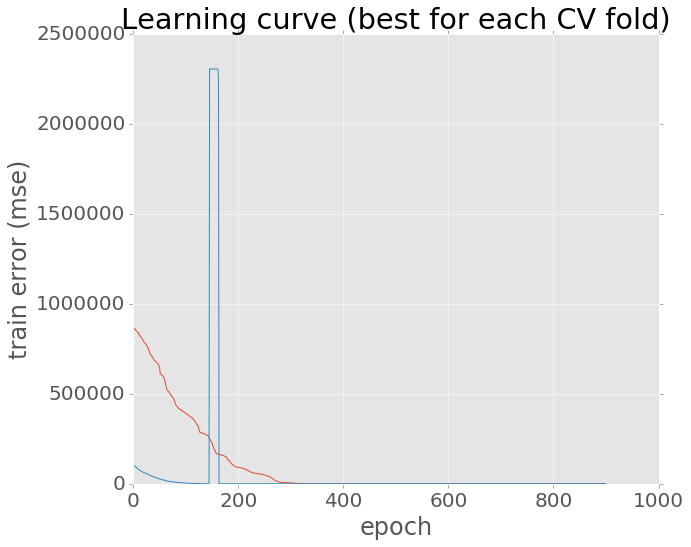

In [253]:
bn_id = argmax(error_hist[-1,:])
error_hist[error_hist==0] = learning_goal
for bn_id in range(K):
    plot(error_hist[100:,bn_id]); xlabel('epoch'); ylabel('train error (mse)'); title('Learning curve (best for each CV fold)')

plot(range(max_epochs), [learning_goal]*max_epochs, '-.')


show()

In [254]:
#Average crimes repor
data_normalized.max()

Cases                     0.969622
medianIncome              0.763850
youthUnemployment2013     0.537187
unemployment2013          0.518276
unemploymentChange        0.467908
reportedCrime             0.604800
populationChange          0.623130
hasEducation              0.768005
asylumCosts               0.926344
urbanDegree               0.371594
foreignBorn               0.792417
reportedCrimeVandalism    0.799293
youngUnskilled            0.546198
population                0.965572
populationShare65plus     0.498725
refugees                  0.872836
dtype: float64

176.281974073 MSE linear regression
251.816043154 MSE neural network
231.654 MSE with average comparison
Classifiers are not significantly different (p=0.0607979366144)


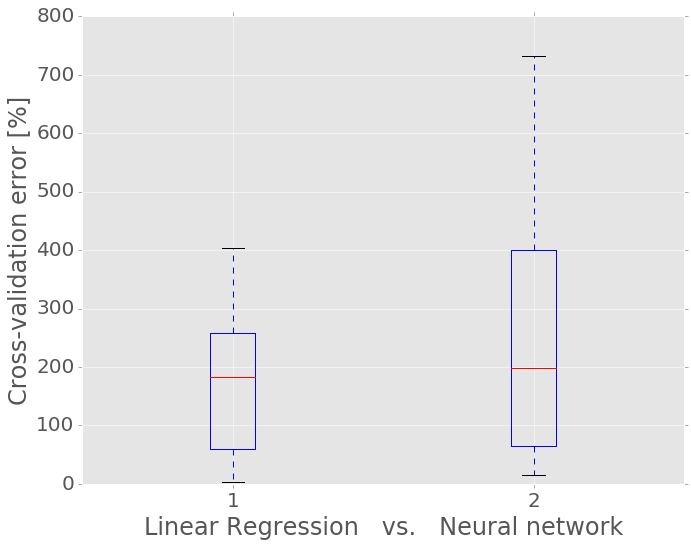

Classifiers are not significantly different (p=0.0705798789031)


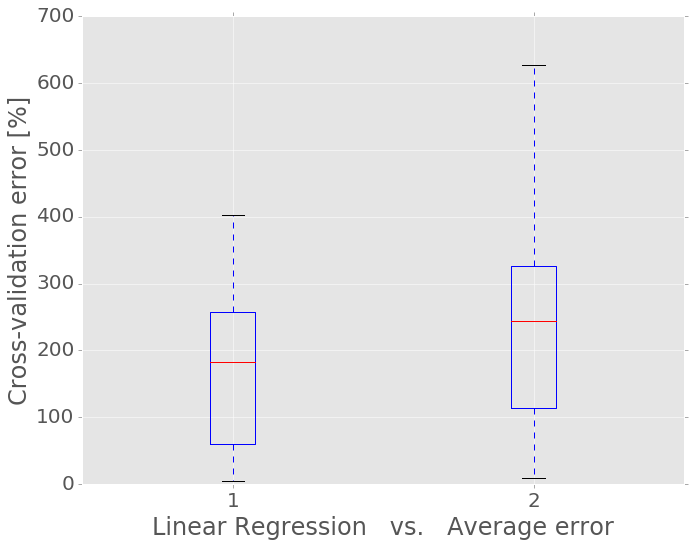

In [266]:
#Statistical significans test
from scipy import stats
count = N

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams.update({'font.size': 20})


test_x = X[count:,:]
test_y = y[count:,0]


error_linear_regression = abs(test_y[:,0] - classifier.predict(test_x))
# error = test_y[0,:] - test_y[0,:]
mean_square_error = np.sqrt(np.square(error_linear_regression)).sum()/len(test_y)
print (mean_square_error), "MSE linear regression"

error_neural_network = abs(test_y - ann.sim(test_x))
# error = test_y[0,:] - test_y[0,:]
mean_square_error = np.sqrt(np.square(error_neural_network)).sum()/len(test_y)
print (mean_square_error), "MSE neural network"


error_average = abs(test_y - np.mean(y_train))
mean_square_error = np.sqrt(np.square(error_average)).sum()/len(test_y)
print (mean_square_error), "MSE with average comparison"

[tstatistic, pvalue] = stats.ttest_ind(error_linear_regression,error_neural_network)
if pvalue<=0.05:
    print('Classifiers are significantly different. (p={0})'.format(pvalue[0]))
else:
    print('Classifiers are not significantly different (p={0})'.format(pvalue[0]))    
    
plt.figure()
plt.boxplot(np.bmat('error_linear_regression, error_neural_network'))
plt.xlabel('Linear Regression   vs.   Neural network')
plt.ylabel('Cross-validation error [%]')

plt.show()


##Linear vs average guess
[tstatistic, pvalue] = stats.ttest_ind(error_linear_regression,error_average)
if pvalue<=0.05:
    print('Classifiers are significantly different. (p={0})'.format(pvalue[0]))
else:
    print('Classifiers are not significantly different (p={0})'.format(pvalue[0]))    
    
plt.figure()
plt.boxplot(np.bmat('error_linear_regression, error_average'))
plt.xlabel('Linear Regression   vs.   Average error')
plt.ylabel('Cross-validation error [%]')

plt.show()



In [267]:
error_linear_regression


matrix([[ 263.99427794],
        [  83.91973915],
        [ 254.92541169],
        [   3.59189753],
        [ 190.64681006],
        [ 183.13350441],
        [ 364.81544162],
        [  54.44777157],
        [  10.09436451],
        [ 225.27167972],
        [ 186.99073386],
        [ 181.38294023],
        [  13.83128028],
        [  21.28199094],
        [ 376.61821427],
        [ 280.98903011],
        [   4.81221364],
        [ 228.65286253],
        [ 118.1673602 ],
        [ 146.57967048],
        [ 251.71887905],
        [ 154.57623272],
        [ 283.24013149],
        [ 157.57303397],
        [ 358.88475066],
        [ 308.97829474],
        [ 216.27452439],
        [  33.35937691],
        [ 365.03067941],
        [ 403.06677187],
        [ 224.78445536],
        [ 174.76234388],
        [   8.21621481],
        [  27.25067035],
        [ 327.44608093],
        [  53.64436746],
        [  62.29994686],
        [ 115.66408585],
        [  74.73734863],
        [ 255.62357884]])